# Setup

In [ ]:
pip install python-tsp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 31.5 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.27.1
    Uninstalling requests-2.27.1:
      Successfully uninstalled requests-2.27.1
  Attempting uninstall: networkx
    Found existing installation: networkx 3.1
    Uninstalling networkx-3.1:
      Successfully uninstalled networkx-3.1


In [ ]:
# Import the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import math
from tqdm import tqdm
from python_tsp.heuristics import solve_tsp_simulated_annealing

In [ ]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd drive/MyDrive/dataset/DSA4212

/content/drive/MyDrive/dataset/DSA4212


In [ ]:
data = np.load("cities.npy", allow_pickle = True)
x = np.transpose(data)[0]
y = np.transpose(data)[1]

# Define distance matrix

In [ ]:
def euclidean_dist(a,b):
  return math.sqrt((a[0]-b[0])**2 + (a[1]-b[1])**2)

In [ ]:
n = 1000
distances = np.zeros((n,n))
for i in range(n):
  for j in range(i, n):
    dist = euclidean_dist(data[i], data[j])
    distances[i][j] = dist
    distances[j][i] = dist

# Simulated Annealing

In [ ]:
permutation, distance = solve_tsp_simulated_annealing(distances)

In [ ]:
distance

27.31199092199197

In [ ]:
def route_length(route):
  return sum(distances[route[i]][route[i+1]] for i in range(len(route)-1)) + distances[route[0]][route[-1]]

In [ ]:
route_length(permutation) #check if they tally

27.311990921991978

length:  27.311990921991978


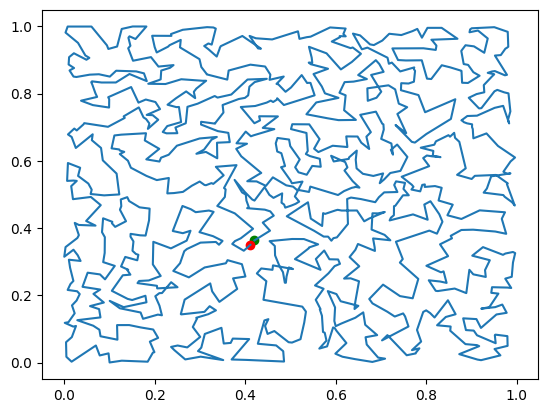

In [ ]:
print("length: ", route_length(permutation))
new_x = x[permutation]
new_y = y[permutation]

plt.plot(new_x, new_y)
plt.scatter(new_x[0], new_y[0], color = "green")
plt.scatter(new_x[-1], new_y[-1], color = "red")

# 2-opt 

In the following two-opt code, we only run the outer loop from 'start', which is 5 cities before the city where the two-opt algo last cut the cycle to improve the distance. This approximation improves the time taken for the function to run greatly. 

In [ ]:
def two_opt(route):
  n = len(route)
  improved = True
  best_distance = route_length(route)
  start = 1
  while improved:
    improved = False
    best_distance = route_length(route)
    for i in tqdm(range(start,n-2)):
      if improved:
        break
      for j in range(i+1, n-1):
        new_route = route[:i] + route[i:j+1][::-1] + route[j+1:]
        new_distance = route_length(new_route)
        if new_distance < best_distance:
          route = new_route
          best_distance = new_distance
          print("best: ", best_distance)
          improved = True
          start = max(i - 5, start) #does not start the next loop from 0, so the code can run faster
        if improved:
          break
  return route

In [ ]:
new_route = two_opt(permutation)

  1%|          | 12/997 [00:08<11:36,  1.42it/s]


best:  27.287646458430952


  0%|          | 3/991 [00:01<07:28,  2.20it/s]


best:  27.26308650839068


  1%|▏         | 13/991 [00:05<07:04,  2.31it/s]


best:  27.257394884744606


  0%|          | 4/984 [00:01<05:40,  2.88it/s]


best:  27.255884914792702


  1%|          | 7/984 [00:05<13:27,  1.21it/s]


best:  27.232400597861734


  1%|          | 6/983 [00:02<06:05,  2.67it/s]


best:  27.22025844198125


  1%|          | 7/983 [00:02<06:14,  2.60it/s]


best:  27.201791285177706


  1%|          | 7/982 [00:02<06:17,  2.58it/s]


best:  27.200085703264293


  1%|          | 8/981 [00:04<08:28,  1.91it/s]


best:  27.18947500955879


  2%|▏         | 17/979 [00:08<08:23,  1.91it/s]


best:  27.18620832706143


  2%|▏         | 16/968 [00:09<09:00,  1.76it/s]


best:  27.181855738848213


  1%|          | 6/958 [00:02<06:23,  2.48it/s]


best:  27.169599968275506


  1%|▏         | 12/958 [00:04<06:20,  2.49it/s]


best:  27.13888379383701


  5%|▌         | 52/952 [00:31<09:00,  1.66it/s]


best:  27.136521471297343


  2%|▏         | 19/906 [00:10<07:57,  1.86it/s]


best:  27.120500965835546


  1%|          | 11/893 [00:04<05:34,  2.64it/s]


best:  27.091858838024365


  7%|▋         | 62/888 [00:29<06:35,  2.09it/s]


best:  27.090620001914736


  1%|          | 6/832 [00:01<04:28,  3.07it/s]


best:  27.07097606297502


  1%|          | 7/832 [00:02<04:30,  3.05it/s]


best:  27.069440303185274


  1%|          | 6/831 [00:02<05:09,  2.66it/s]


best:  27.048055370995947


  1%|          | 7/831 [00:04<09:22,  1.47it/s]


best:  27.041597270123326


  6%|▌         | 46/830 [00:19<05:35,  2.34it/s]


best:  27.03370061758512


  1%|          | 8/790 [00:02<04:11,  3.11it/s]


best:  27.032982325264854


  1%|          | 6/788 [00:01<03:55,  3.32it/s]


best:  27.010278509955263


  1%|▏         | 10/788 [00:05<07:41,  1.69it/s]


best:  26.989087877659543


  2%|▏         | 15/784 [00:05<04:22,  2.93it/s]


best:  26.929315180823266


 13%|█▎        | 97/775 [00:40<04:44,  2.38it/s]


best:  26.928627258151074


  4%|▎         | 25/684 [00:07<03:18,  3.32it/s]


best:  26.916386286566876


  2%|▏         | 10/665 [00:03<03:19,  3.29it/s]


best:  26.897108999021555


  0%|          | 2/661 [00:00<03:44,  2.94it/s]


best:  26.890537488498545


  2%|▏         | 14/661 [00:06<04:45,  2.27it/s]


best:  26.887656016158324


  3%|▎         | 21/653 [00:05<02:58,  3.55it/s]


best:  26.88139623991789


 11%|█         | 67/638 [00:26<03:49,  2.49it/s]


best:  26.876827610462755


  3%|▎         | 18/577 [00:04<02:22,  3.93it/s]


best:  26.876306780786727


  5%|▌         | 31/565 [00:10<03:01,  2.95it/s]


best:  26.86091947415715


  1%|▏         | 7/540 [00:01<01:54,  4.64it/s]


best:  26.859347527460862


  1%|          | 6/539 [00:01<01:49,  4.88it/s]


best:  26.85827099977267


  2%|▏         | 10/539 [00:02<01:59,  4.41it/s]


best:  26.836601076271798


  9%|▉         | 48/535 [00:14<02:22,  3.43it/s]


best:  26.83378972151501


  2%|▏         | 10/493 [00:02<01:38,  4.89it/s]


best:  26.813053343247645


  3%|▎         | 17/489 [00:03<01:39,  4.73it/s]


best:  26.793318290873337


  5%|▌         | 25/478 [00:08<02:26,  3.10it/s]


best:  26.782522499619645


  8%|▊         | 38/459 [00:07<01:25,  4.92it/s]


best:  26.78225355153463


  7%|▋         | 28/427 [00:08<01:54,  3.49it/s]


best:  26.773585183009473


  1%|▏         | 6/405 [00:00<01:04,  6.22it/s]


best:  26.762518366921327


  7%|▋         | 27/405 [00:04<01:07,  5.58it/s]


best:  26.749137071882714


  2%|▏         | 6/384 [00:00<00:57,  6.63it/s]


best:  26.743383656231025


 21%|██        | 81/384 [00:15<00:59,  5.06it/s]


best:  26.734624884802642


  1%|▏         | 4/309 [00:00<01:13,  4.14it/s]


best:  26.734466529253147


  9%|▊         | 27/309 [00:05<01:01,  4.58it/s]


best:  26.731359156176197


 14%|█▍        | 41/288 [00:05<00:30,  8.00it/s]


best:  26.72835517609311


 23%|██▎       | 58/253 [00:08<00:30,  6.49it/s]


best:  26.71782523200374


  2%|▏         | 4/201 [00:00<00:13, 14.47it/s]


best:  26.716344458899933


 95%|█████████▍| 190/201 [00:10<00:00, 18.52it/s]


best:  26.71274255742528


 53%|█████▎    | 9/17 [00:00<00:00, 66.73it/s]


best:  26.712457557640427


100%|██████████| 14/14 [00:00<00:00, 124.01it/s]


length:  26.712457557640427


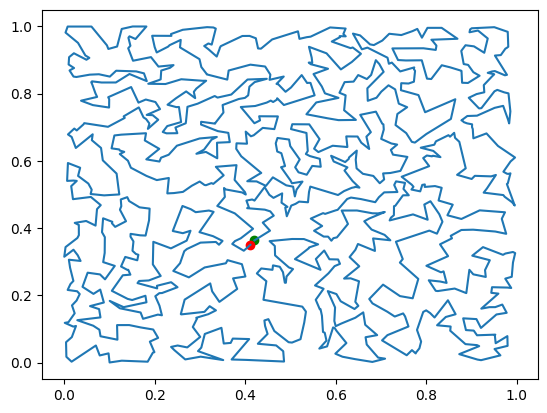

In [ ]:
print("length: ", route_length(new_route))
new_x = x[new_route]
new_y = y[new_route]

plt.plot(new_x, new_y)
plt.scatter(new_x[0], new_y[0], color = "green")
plt.scatter(new_x[-1], new_y[-1], color = "red")

In [ ]:
new_route2 = two_opt(new_route)

 74%|███████▍  | 740/997 [04:34<01:35,  2.70it/s]


best:  26.709550687523326


  2%|▏         | 6/263 [00:00<00:28,  9.09it/s]


best:  26.695158641377198


  1%|          | 3/263 [00:00<00:20, 12.44it/s]


best:  26.690842498811186


100%|██████████| 263/263 [00:19<00:00, 13.63it/s]
